In [7]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm

from matplotlib.ticker import AutoMinorLocator

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 9).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = 'line'
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7


In [8]:
nlons = 72
nlats = 36
grid = Spharmt(nlons,nlats,gridtype='regular',rsphere=3371e3)


[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j]


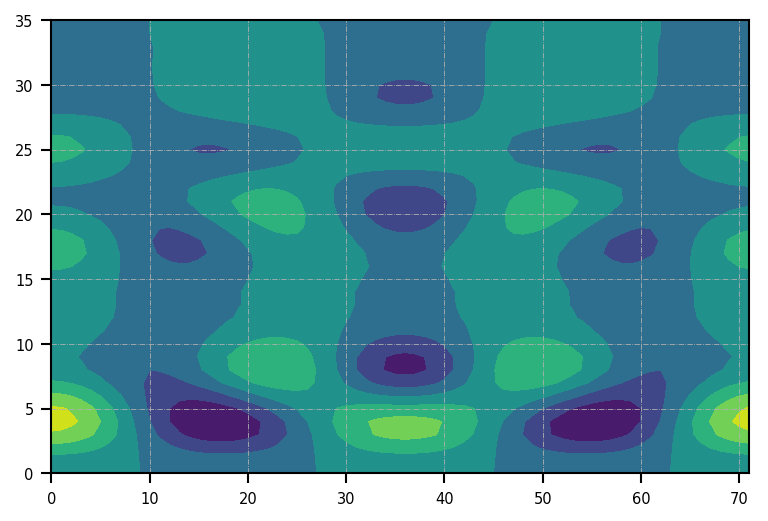

In [20]:
s = grid.grdtospec(np.zeros((nlats,nlons)), ntrunc=10)
print(s)
s[:]=0.
s[25:35]=np.random.random(10)
contourf(grid.spectogrd(s))
# grid.grdtospec?

[  31  700 1369 2038 2707 3376 4045 4714 5383 6052]
(6720,) (6690,)
[ 343.60198975  344.14489746  344.68685913 ...,  341.96746826  342.51327515
  343.05810547]


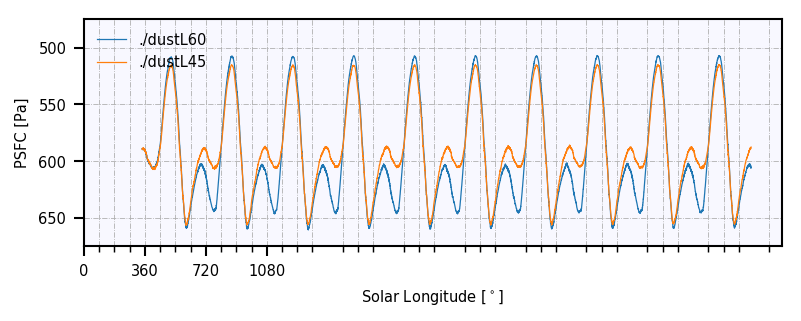

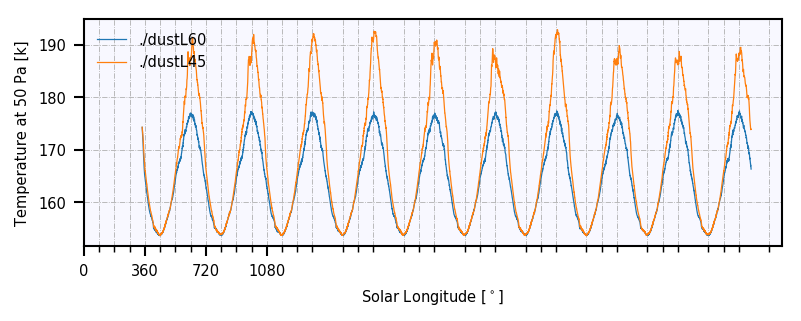

In [16]:
from netCDF4 import Dataset

major_ticks = np.arange(0, 360*4, 360)  

def yearly_ls(ls):
    idx = np.where(ls==360)[0]
    print (idx)
    counter = 1
    for i in np.arange(idx.size-1):
        ls[idx[i]:idx[i+1]] += counter*360
        ls[idx[i]] -= 360
        counter += 1
    ls[idx[i+1]:] += counter*360
    ls[idx[i+1]] -= 360
    return ls

# wet data
filedir = './wet_test.nc'
data = Dataset(filedir,'r')
psfcwet = data.variables['PSFC'][:]
twet = data.variables['T'][:][:,25:30].mean(axis=1)
ls = data.variables['LS'][:]
ls = yearly_ls(ls)

# dust data
filedir = './dust_test.nc'
data = Dataset(filedir,'r')
psfcdust = data.variables['PSFC'][:]
tdust = data.variables['T'][:][:,25:30].mean(axis=1)
lsdust = data.variables['LS'][:]
lsdust = lsdust[:6690]

full_arr = 2000
fig, ax = plt.subplots(figsize=(6,2))
plot(ls[:], psfcwet[:], label='./dustL60')
plot(ls[:], psfcdust[:6690], label='./dustL45')
ylabel('PSFC [Pa]')
xlabel('Solar Longitude [$^\circ$]')
xticks(major_ticks)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(True, which='both')
ylim([675,475])
legend()

print(psfcdust.shape, psfcwet.shape)
print(lsdust)

fig, ax = plt.subplots(figsize=(6,2))
plot(ls[:], twet[:], label='./dustL60')
plot(ls[:],tdust[:6690], label='./dustL45')
ylabel('Temperature at 50 Pa [k]')
xlabel('Solar Longitude [$^\circ$]')
xticks(major_ticks)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(True, which='both')
legend()


100%|██████████| 18/18 [00:00<00:00, 3549.98it/s]


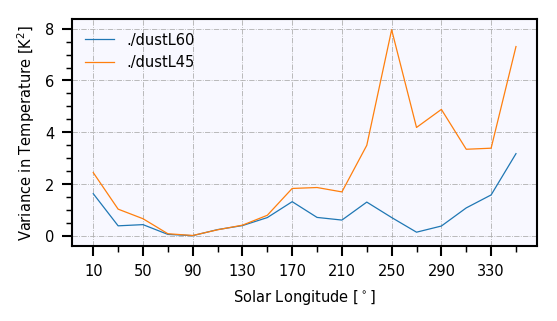

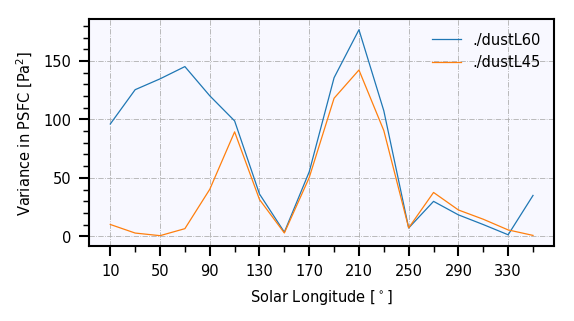

In [15]:
vart = np.zeros((18,2)) # shape depending on the period
varp = np.zeros((18,2)) # shape depending on the period
for i in tqdm(np.arange(18)):
    tmp = np.where(abs(lsdust-(i*20+10))<10)[0]
    
    dust_var = np.var(tdust[tmp])
    wet_var = np.var(twet[tmp])
    vart[i] = [dust_var, wet_var]
    
    dust_var = np.var(psfcdust[tmp])
    wet_var = np.var(psfcwet[tmp])
    varp[i] = [dust_var, wet_var]

fig, ax = plt.subplots(figsize=(4,2))
major_ticks = np.arange(10,370,40)
xaxis = np.arange(10,370,20)
plot(xaxis,vart[:,1], label='./dustL60')
plot(xaxis, vart[:,0], label='./dustL45')
xticks(major_ticks)
ylabel('Variance in Temperature [K$^2$]')
xlabel('Solar Longitude [$^\circ$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# ax.grid(True, which='both')
legend()

fig, ax = plt.subplots(figsize=(4,2))
major_ticks = np.arange(10,370,40)
xaxis = np.arange(10,370,20)
plot(xaxis,varp[:,1], label='./dustL60')
plot(xaxis, varp[:,0], label='./dustL45')
xticks(major_ticks)
ylabel('Variance in PSFC [Pa$^2$]')
xlabel('Solar Longitude [$^\circ$]')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax.grid(True, which='both')
legend()

In [12]:
idx[0].reshape((10,40))

NameError: name 'idx' is not defined